# PyBer Ride Sharing

# Analysis
1. There are more rides on a populated area (Urban), and the fare is lower than the other type of cities.
2. The fares are higher on rural cities with less amount of rides and drivers.
3. The higher concentration of rides are between 15 & 30 rides.
4. The majority of the amount of the fares are spent in the Urban area even though they are not the most expensive ones. 
5. As it was expected there are much more drivers (~90%) in the populated area (Urban) than any of the other type of cities.

In [1]:
# -----------------------------------------------------------------------------------------
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) 
# that showcases the relationship between four key variables:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import os

In [3]:
# Getting the data from file One --> (city_Data)
city_data_df = pd.read_csv('raw_data/city_data.csv')
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
# Remove any duplicated Data
city_data_df = city_data_df.drop_duplicates('city', keep = 'first')

In [5]:
# Getting the data from file two --> (ride_Data)
ride_data_df = pd.read_csv('raw_data/ride_data.csv')
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Combine - Merge both files based on the city
combined_pyber_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')
combined_pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
# Get the Average Fare ($) Per City: 
# Group the merged DataFrame by City
grouped_city = combined_pyber_df.groupby('city')

In [8]:
# Get the mean of Fare from the grouped Data Frame
average_city = grouped_city['fare'].mean()

In [9]:
# Just rpound the average fare by city to two decimals
average_city = round(average_city,2)
#average_city

In [10]:
# Getting the total Number of Rides Per City by used the grouped Data Frame and using Count
rides_per_city = grouped_city['ride_id'].count()
#rides_per_city

In [11]:
# Obtain the Total Number of Drivers Per City using the same grouped data frame and getting the mean
drivers_per_city = grouped_city['driver_count'].mean()
#drivers_per_city

In [12]:
# Use the original Data Frame (cities.csv)  file and set the index to city type and assign to zone  
# City Type (Urban, Suburban, Rural)
zone = city_data_df.set_index('city')['type']
#zone

In [13]:
# Create a DataFrame with the information that has been previously obtained and sort it by Zone Type
city_info = pd.DataFrame({
                "Number Of Rides": rides_per_city,
                "Average Fare": average_city,
                "Drivers Per City": drivers_per_city,
                "Zone Type": zone
})
city_info.sort_values('Zone Type', ascending = True)

,Average Fare,Drivers Per City,Number Of Rides,Zone Type
East Troybury,33.24,3,7,Rural
West Kevintown,21.53,5,7,Rural
East Stephen,39.05,6,10,Rural
East Leslie,33.66,9,11,Rural
Hernandezshire,32.00,10,9,Rural
South Joseph,38.98,3,12,Rural
Horneland,21.48,8,4,Rural
Jacksonfort,32.01,6,6,Rural
Erikport,30.04,3,8,Rural
North Whitney,38.15,10,10,Rural


In [14]:
# Assign variables to the different Types of Zones within the cities
urban = city_info[city_info["Zone Type"] == "Urban"]
rural = city_info[city_info["Zone Type"] == "Rural"]
suburban = city_info[city_info["Zone Type"] == "Suburban"]

# Bubble Plot Of Ride Sharing Data

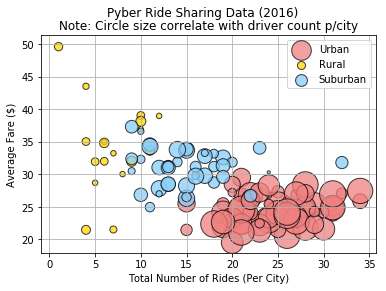

In [15]:
# Creating base chart - Including chart tittle, axis labels, notation
plt.suptitle("Pyber Ride Sharing Data (2016)")
plt.title("Note: Circle size correlate with driver count p/city")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add the Grid and use gray as the grid Color
plt.rc('grid', linestyle="-", color='gray')
plt.grid(True)
# Create the actual Bubble Chart
x_urban= urban['Number Of Rides']
y_urban= urban['Average Fare']
drivers_urban = urban['Drivers Per City']
x_rural= rural['Number Of Rides']
y_rural= rural['Average Fare']
drivers_rural = rural['Drivers Per City']
x_suburban= suburban['Number Of Rides']
y_suburban= suburban['Average Fare']
drivers_suburban = suburban['Drivers Per City']
plt.scatter(x_urban, y_urban, s = drivers_urban * 10, c="lightcoral", edgecolor= "black", linewidth=1, 
            alpha = 0.75, label = "Urban")
plt.scatter(x_rural, y_rural, s = drivers_rural * 10, c="gold", edgecolor= "black", linewidth=1, alpha = 0.75, 
           label = "Rural")
plt.scatter(x_suburban, y_suburban, s = drivers_suburban * 10, c="lightskyblue", edgecolor= "black", linewidth=1, 
            alpha = 0.75, label = "Suburban")
plt.legend()
plt.show()

In [16]:
#In addition, you will be expected to produce the following three pie charts:
#* % of Total Fares by City Type
#* % of Total Rides by City Type
#* % of Total Drivers by City Type

In [17]:
# Create basic data for Pie Charts

In [18]:
# Create a Data Frame by grouping the Merged Data Frame by City Type uisng the required data 
# --> This will be used on the pie charts
grp_by_city_type = combined_pyber_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
#grp_by_city_type.head()

In [19]:
# Get the total fare by City Type
total_fare = grp_by_city_type.sum()['fare']
#total_fare.head()

# Total Fares By City Type

<function matplotlib.pyplot.show>

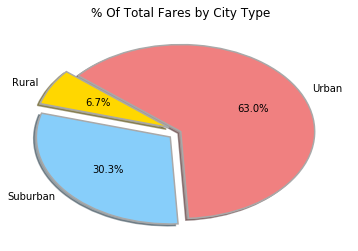

In [20]:
# Create the First pie chart
labels = total_fare.index
# Formatting the pie chart according to the requirements
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0.1, 0)
# Create the Pie Chart
plt.pie(total_fare, explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140, wedgeprops = {'linewidth': 1.5, 'edgecolor': 'darkgray'})
# Show the Pie Chart
plt.title("% Of Total Fares by City Type")
plt.show

# Total Rides By City Type

In [21]:
# Get the total Rides by City Type
total_ride = grp_by_city_type.count()['ride_id']
#total_ride.head()

<function matplotlib.pyplot.show>

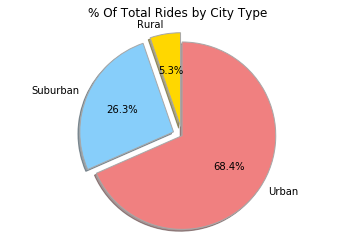

In [22]:
# Create the Second pie chart
labels = total_ride.index
# Formatting the pie chart according to the requirements
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0.1, 0)
# Create the Pie Chart
plt.pie(total_ride, explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops = {'linewidth': 1, 'edgecolor': 'darkgray'})
# Show the Pie Chart
plt.title("% Of Total Rides by City Type")
plt.axis("equal")
plt.show

# Total Drivers By City Type

In [23]:
# Get the total Drivers by City Type
total_drivers = grp_by_city_type.sum()['driver_count']
#total_drivers.head()

<function matplotlib.pyplot.show>

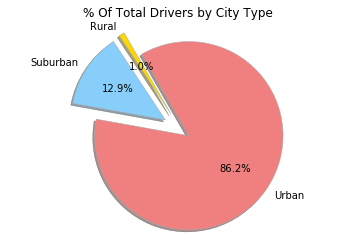

In [24]:
# Create the Third pie chart
labels = total_drivers.index
# Formatting the pie chart according to the requirements
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2, 0.2, 0.1)
# Create the Pie Chart
plt.pie(total_drivers, explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=120, wedgeprops = {'linewidth': 0.5, 'edgecolor': 'darkgray'})
# Show the Pie Chart
plt.title("% Of Total Drivers by City Type")
plt.axis("equal")
plt.show